# Assessment - Machine Learning, Data Coordinator with eHealth Africa

© 2024

---

## Section B

eHealth Africa has carried out investigation on various factors that can cause heart disease. The data on patients with the heart disease are collected in the southern and northern part of Nigeria and the description of the data is shown in Table 1.

### Table 1: Heart Disease Data Dictionary

| Variable Name | Description                               | Role   | Type     | Units     |
|---------------|-------------------------------------------|--------|----------|-----------|
| `age`           | age of the patient                        | Feature| Integer  | years     |
| `sex`           | gender of the patient                     | Feature| Categorical | -      |
| `cp`            | Chest pain type                           | Feature| Categorical | -      |
| `trestbps`      | resting blood pressure (on admission to the hospital) | Feature | Integer | mm/Hg |
| `chol`          | serum cholesterol                         | Feature| Integer  | mg/dl    |
| `fbs`           | fasting blood sugar > 120 mg/dl           | Feature| Categorical | -      |
| `restecg`       | Resting electrocardiographic results      | Feature| Categorical | -      |
| `thalach`       | maximum heart rate achieved               | Feature| Integer  | -         |
| `exang`         | exercise induced angina                   | Feature| Categorical | -      |
| `oldpeak`       | ST depression induced by exercise  relative to rest        | Feature| Float    | - |
| `slope`         | Slope of the peak exercise ST segment     | Feature| Categorical | -      |
| `ca`            | number of major vessels (0-3) colored by fluoroscopy | Feature | Integer | - |
| `thal`          | Thallium stress test                      | Feature| Categorical | -      |
| `status`        | diagnosis of heart disease                | Target | Categorical | -      |

- GOAL: Predict the presence of heart disease in patients using machine learning models and data science techniques for predictive modelling and risk analysis, particularly in the healthcare sector.
- Dataset: Heart disease data from southern and northern Nigeria.


<a id="cont"></a>

## Table of Contents

<a href=#packages>i. Importing Packages</a>

<a href=#loading>ii. Data Loading</a>

<a href=#eda> iii. Exploratory Data Analysis (EDA)

<a href=#one>1. Data Consolidation</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="packages"></a>
## i. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |

---

In [626]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report


<a id="loading"></a>
## ii. Data Loading
<!-- <a class="anchor" id="1.1"></a> -->
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [627]:
# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

DATA_PATH_NORTH = "northern heart diease data.csv"
DATA_PATH_SOUTH = "southern heart disease data.csv"

# load the data
df_north = pd.read_csv(DATA_PATH_NORTH)
df_south = pd.read_csv(DATA_PATH_SOUTH)

<a id="eda"></a>
## iii. Initial Exploration
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Initial Exploration ⚡ |
| :--------------------------- |
| In this section, I performed an Initial exploration  on all the variables in the DataFrame. |

---


In [628]:
# Get data info
df_north.info()
df_north.head()



# Get summary statistics for numerical features
#df_north.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  302 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        299 non-null    float64
 12  thal      301 non-null    object 
 13  status    303 non-null    object 
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 31.2+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63.0,male,typical angina,145.0,233,True,2,150,no,2.3,downsloping,0.0,fixed defect,absent
1,67.0,male,asymptomatic,160.0,286,False,2,108,yes,1.5,flat,3.0,normal,present
2,67.0,male,asymptomatic,120.0,229,False,2,129,yes,2.6,flat,2.0,reversable defect,present
3,37.0,male,non-anginal pain,130.0,250,False,0,187,no,3.5,downsloping,0.0,normal,absent
4,41.0,female,atypical angina,130.0,204,False,2,172,no,1.4,upsloping,0.0,normal,absent


In [629]:
# Get data info
df_south.info()
df_south.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          268 non-null    float64
 1   sex          270 non-null    object 
 2   cp           270 non-null    object 
 3   trestbps     270 non-null    int64  
 4   chol         270 non-null    int64  
 5   fbs          270 non-null    object 
 6   restecg      270 non-null    int64  
 7   thalach      267 non-null    float64
 8   exang        270 non-null    bool   
 9   oldpeak      270 non-null    float64
 10  slope        270 non-null    object 
 11  ca           270 non-null    int64  
 12  thal         270 non-null    object 
 13  status       270 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
dtypes: bool(1), float64(5), int64(4), object(6)
memory usage: 32.0+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status,Unnamed: 14,Unnamed: 15
0,70.0,male,asymptomatic,130,322,no,2,109.0,False,2.4,flat,3,normal,present,NaN,NaN
1,67.0,female,non-anginal pain,115,564,no,2,160.0,False,1.6,flat,0,reversable defect,absent,NaN,NaN
2,57.0,male,atypical angina,124,261,no,0,141.0,False,0.3,upsloping,0,reversable defect,present,NaN,NaN
3,64.0,male,asymptomatic,128,263,no,0,105.0,True,0.2,flat,1,reversable defect,absent,NaN,NaN
4,74.0,female,atypical angina,120,269,no,2,121.0,True,0.2,upsloping,1,normal,absent,NaN,NaN


# Check unique values in categorical columns
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for feature in categorical_features:
    print(f'{feature}: {data[feature].unique()}')

### Dataset Overview

The `df_south` DataFrame contains **270 entries** and **16 columns**. The following are the key details regarding the columns:

- **Data Types**:
  - **Float64**: 5 columns (e.g., `age`, `thalach`, `oldpeak`)
  - **Int64**: 4 columns (e.g., `trestbps`, `chol`, `ca`)
  - **Object**: 6 columns (e.g., `sex`, `cp`, `fbs`, `slope`, `thal`, `status`)
  - **Bool**: 1 column (`exang`)

- **Non-Null Counts**:
  - The columns `age` and `thalach` have missing values (268 and 267 non-null entries, respectively), while all other columns are fully populated.
  - There are two unnamed columns that contain no data.

This summary provides a foundational understanding of the data structure, types, and potential areas needing attention, such as missing values in specific columns.


As seen from the outputs above, the north dataset has `303` rows and `14` columns; while that of south is `270` rows and `16` columns. The `fbs` and `exang` columns are not consistent across both dataset.

 <a id="one"></a>
## 1. Data Consolidation
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| o Are any transformations required for specific variables to ensure they are directly comparable between the two datasets? How will these transformations affect the analysis? |
| o After consolidating the datasets, what steps will be taken to validate the integrity and accuracy of the combined data? |

---![Alt text](image.png)

In [630]:
df_south.drop(columns = ['Unnamed: 14', 'Unnamed: 15'], axis = 1, inplace = True)
df_south.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,70.0,male,asymptomatic,130,322,no,2,109.0,False,2.4,flat,3,normal,present
1,67.0,female,non-anginal pain,115,564,no,2,160.0,False,1.6,flat,0,reversable defect,absent
2,57.0,male,atypical angina,124,261,no,0,141.0,False,0.3,upsloping,0,reversable defect,present
3,64.0,male,asymptomatic,128,263,no,0,105.0,True,0.2,flat,1,reversable defect,absent
4,74.0,female,atypical angina,120,269,no,2,121.0,True,0.2,upsloping,1,normal,absent


In [631]:
# Merge the datasets
df_combined = pd.concat([df_north, df_south], axis=0)

# Reset index for the combined DataFrame
df_combined.reset_index(drop=True, inplace=True)

# Display the first few rows of the merged dataset
df_combined.info()  # To check the structure of the combined dataset
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       569 non-null    float64
 1   sex       573 non-null    object 
 2   cp        573 non-null    object 
 3   trestbps  572 non-null    float64
 4   chol      573 non-null    int64  
 5   fbs       573 non-null    object 
 6   restecg   573 non-null    int64  
 7   thalach   570 non-null    float64
 8   exang     573 non-null    object 
 9   oldpeak   573 non-null    float64
 10  slope     573 non-null    object 
 11  ca        569 non-null    float64
 12  thal      571 non-null    object 
 13  status    573 non-null    object 
dtypes: float64(5), int64(2), object(7)
memory usage: 62.8+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63.0,male,typical angina,145.0,233,True,2,150.0,no,2.3,downsloping,0.0,fixed defect,absent
1,67.0,male,asymptomatic,160.0,286,False,2,108.0,yes,1.5,flat,3.0,normal,present
2,67.0,male,asymptomatic,120.0,229,False,2,129.0,yes,2.6,flat,2.0,reversable defect,present
3,37.0,male,non-anginal pain,130.0,250,False,0,187.0,no,3.5,downsloping,0.0,normal,absent
4,41.0,female,atypical angina,130.0,204,False,2,172.0,no,1.4,upsloping,0.0,normal,absent


In [632]:
df_combined.duplicated().sum()

0

In [633]:
df_south['exang'] = df_south['exang'].replace({False: 'no', True: 'yes'}).astype('str')
df_south.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,70.0,male,asymptomatic,130,322,no,2,109.0,no,2.4,flat,3,normal,present
1,67.0,female,non-anginal pain,115,564,no,2,160.0,no,1.6,flat,0,reversable defect,absent
2,57.0,male,atypical angina,124,261,no,0,141.0,no,0.3,upsloping,0,reversable defect,present
3,64.0,male,asymptomatic,128,263,no,0,105.0,yes,0.2,flat,1,reversable defect,absent
4,74.0,female,atypical angina,120,269,no,2,121.0,yes,0.2,upsloping,1,normal,absent


In [634]:
df_north['fbs'] = df_north['fbs'].replace({False: 'no', True: 'yes'}).astype('str')
df_north.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63.0,male,typical angina,145.0,233,yes,2,150,no,2.3,downsloping,0.0,fixed defect,absent
1,67.0,male,asymptomatic,160.0,286,no,2,108,yes,1.5,flat,3.0,normal,present
2,67.0,male,asymptomatic,120.0,229,no,2,129,yes,2.6,flat,2.0,reversable defect,present
3,37.0,male,non-anginal pain,130.0,250,no,0,187,no,3.5,downsloping,0.0,normal,absent
4,41.0,female,atypical angina,130.0,204,no,2,172,no,1.4,upsloping,0.0,normal,absent


<a id="two"></a>
## 2. Data Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| o Are there any missing values in the dataset? If so, how do you propose to handle them? |
| o How would you deal with any outliers in the dataset? Justify your approach. |
<!-- | In this section you are required to load the data from the `df_train` file into a DataFrame. | -->

---

In [635]:
df_south.isnull().sum()

age         2
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     3
exang       0
oldpeak     0
slope       0
ca          0
thal        0
status      0
dtype: int64

In [636]:
df_north.isna().sum()

age         2
sex         0
cp          0
trestbps    1
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
status      0
dtype: int64

### Imputation Strategy for Missing Values

### 1. Age
- **Imputer**: Median Imputation
- **Reason**: 
  - **Robustness to Outliers**: The median is less affected by extreme values, providing a stable measure of central tendency.
  - **Typical Distribution of Age**: Age data is often skewed; the median better reflects the "typical" patient age.
  - **Preservation of Data Integrity**: Retaining rows with imputed values helps maintain dataset size and integrity.
  - **Simplicity and Effectiveness**: Median imputation is straightforward to implement and computationally efficient.

### 2. Trestbps (Resting Blood Pressure)
- **Imputer**: Median Imputation
- **Reason**: 
  - **Robustness to Outliers**: Similar to age, blood pressure readings can also be influenced by outliers. The median provides a more reliable central value.
  - **Health Context**: Blood pressure values often fall within a certain range, making the median a suitable representation.

### 3. Thalach (Maximum Heart Rate Achieved)
- **Imputer**: Median Imputation
- **Reason**: 
  - **Robustness to Outliers**: Heart rate can vary significantly between individuals. The median ensures that extreme values do not skew the imputed results.
  - **Relevance to Health Outcomes**: Maintaining a representative central value is crucial for health-related analyses.

### 4. CA (Number of Major Vessels Colored by Fluoroscopy)
- **Imputer**: Mode Imputation
- **Reason**: 
  - **Nature of the Variable**: The `ca` variable is categorical and represents a count (0-3). The mode (most frequent value) is more appropriate for this type of data.
  - **Interpretability**: Imputing with the mode helps retain the most common case, which is relevant for interpreting the health status of patients.

### 5. Thal (Thallium Stress Test)
- **Imputer**: Mode Imputation
- **Reason**: 
  - **Nature of the Variable**: Like `ca`, the `thal` variable is categorical. Using the mode reflects the most common category, which provides meaningful insights for health outcomes.
  - **Simplifies Analysis**: This method helps maintain the categorical nature of the variable, ensuring that analyses remain interpretable.


### Handling Missng Values

In [637]:
# Impute missing values for each column
# Age
df_north['age'].fillna(df_north['age'].median(), inplace=True)
df_south['age'].fillna(df_south['age'].median(), inplace=True)

# Trestbps
df_north['trestbps'].fillna(df_north['trestbps'].median(), inplace=True)

# Thalach
df_south['thalach'].fillna(df_south['thalach'].median(), inplace=True)

# CA (mode)
df_north['ca'].fillna(df_north['ca'].mode()[0], inplace=True)

# Thal (mode)
df_north['thal'].fillna(df_north['thal'].mode()[0], inplace=True)


In [638]:
# Merge the datasets
df_combined = pd.concat([df_north, df_south], axis=0)

# Reset index for the combined DataFrame
df_combined.reset_index(drop=True, inplace=True)

# Display the first few rows of the merged dataset
df_combined.info()  # To check the structure of the combined dataset
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       573 non-null    float64
 1   sex       573 non-null    object 
 2   cp        573 non-null    object 
 3   trestbps  573 non-null    float64
 4   chol      573 non-null    int64  
 5   fbs       573 non-null    object 
 6   restecg   573 non-null    int64  
 7   thalach   573 non-null    float64
 8   exang     573 non-null    object 
 9   oldpeak   573 non-null    float64
 10  slope     573 non-null    object 
 11  ca        573 non-null    float64
 12  thal      573 non-null    object 
 13  status    573 non-null    object 
dtypes: float64(5), int64(2), object(7)
memory usage: 62.8+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63.0,male,typical angina,145.0,233,yes,2,150.0,no,2.3,downsloping,0.0,fixed defect,absent
1,67.0,male,asymptomatic,160.0,286,no,2,108.0,yes,1.5,flat,3.0,normal,present
2,67.0,male,asymptomatic,120.0,229,no,2,129.0,yes,2.6,flat,2.0,reversable defect,present
3,37.0,male,non-anginal pain,130.0,250,no,0,187.0,no,3.5,downsloping,0.0,normal,absent
4,41.0,female,atypical angina,130.0,204,no,2,172.0,no,1.4,upsloping,0.0,normal,absent


### Converting Features to their appropriate datatypes

In [639]:
# Convert columns to appropriate data types

# Convert 'age' to categorical
df_combined['age'] = df_combined['age'].astype('int')

# Convert 'sex' to categorical
#df_combined['sex'] = df_combined['sex'].astype('str')

# Convert 'cp' (chest pain type) to categorical
#df_combined['cp'] = df_combined['cp'].astype('category')

# Convert 'trestbps' (Resting blood pressure) to integer
df_combined['trestbps'] = df_combined['trestbps'].astype('int')

# Convert 'restecg' (Resting blood pressure) to integer
df_combined['restecg'] = df_combined['restecg'].astype(str)

# Convert 'thalach' (Resting blood pressure) to integer
df_combined['thalach'] = df_combined['thalach'].astype('int')

# Convert 'slope' (slope of the peak exercise ST segment) to categorical
#df_combined['slope'] = df_combined['slope'].astype('category')

# Convert 'thal' (Thallium stress test) to categorical
#df_combined['thal'] = df_combined['thal'].astype('category')

# Convert 'ca' (number of major vessels) to integer (since it represents counts)
df_combined['ca'] = df_combined['ca'].astype('int')

# Convert 'ca' (number of major vessels) to integer (since it represents counts)
#df_combined['status'] = df_combined['status'].astype('str')

# Verify the changes
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       573 non-null    int32  
 1   sex       573 non-null    object 
 2   cp        573 non-null    object 
 3   trestbps  573 non-null    int32  
 4   chol      573 non-null    int64  
 5   fbs       573 non-null    object 
 6   restecg   573 non-null    object 
 7   thalach   573 non-null    int32  
 8   exang     573 non-null    object 
 9   oldpeak   573 non-null    float64
 10  slope     573 non-null    object 
 11  ca        573 non-null    int32  
 12  thal      573 non-null    object 
 13  status    573 non-null    object 
dtypes: float64(1), int32(4), int64(1), object(8)
memory usage: 53.8+ KB


In [640]:
df_combined.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63,male,typical angina,145,233,yes,2,150,no,2.3,downsloping,0,fixed defect,absent
1,67,male,asymptomatic,160,286,no,2,108,yes,1.5,flat,3,normal,present
2,67,male,asymptomatic,120,229,no,2,129,yes,2.6,flat,2,reversable defect,present
3,37,male,non-anginal pain,130,250,no,0,187,no,3.5,downsloping,0,normal,absent
4,41,female,atypical angina,130,204,no,2,172,no,1.4,upsloping,0,normal,absent


In [641]:
df_combined['age'].value_counts().sort_index()

29     2
34     4
35     7
37     4
38     3
39     6
40     6
41    19
42    16
43    15
44    21
45    15
46    14
47     9
48    14
49    10
50    14
51    23
52    24
53    15
54    32
55    15
56    22
57    29
58    34
59    26
60    24
61    15
62    21
63    16
64    19
65    16
66    13
67    17
68     7
69     6
70     8
71     6
74     2
76     2
77     2
Name: age, dtype: int64

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


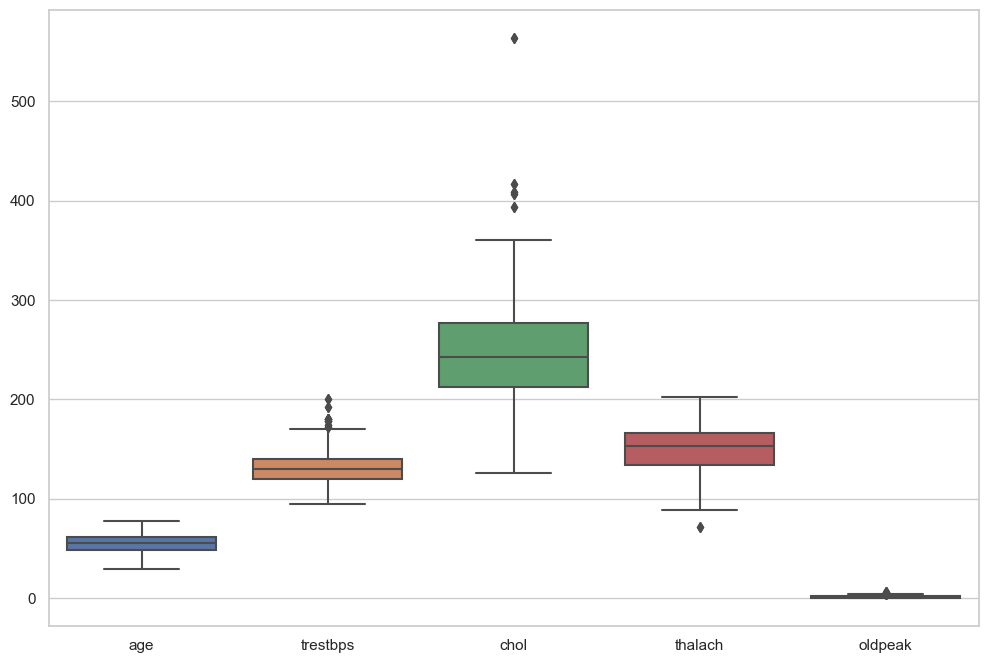

age        -0.189620
trestbps    0.712252
chol        1.153514
thalach    -0.542534
oldpeak     1.263116
ca          1.206261
dtype: float64

In [642]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_combined[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.show()

df_combined.select_dtypes('number').skew()


### LOG TRANSFORMATION
Correcting Skewness

In [643]:
import numpy as np
from scipy import stats

def correct_skewness(df, columns):
    for column in columns:
        skewness = df[column].skew()
        if skewness > 0.5:
            # Apply log transformation for positively skewed data
            df[column] = np.log1p(df[column])  # log1p is log(1 + x), which handles zero values
        elif skewness < -0.5:
            # Apply square transformation for negatively skewed data
            df[column] = np.sqrt(df[column])  # Ensure no negative values before applying
    return df

# Select numerical columns
numerical_columns = df_combined.select_dtypes(include=['number']).columns

# Correct the skewness
df_corrected = correct_skewness(df_combined.copy(), numerical_columns)

# Check skewness after transformation
corrected_skewness = df_corrected[numerical_columns].skew()
print(corrected_skewness)

age        -0.189620
trestbps    0.286174
chol        0.085365
thalach    -0.760529
oldpeak     0.374041
ca          0.768281
dtype: float64


Since Log Transform wasn't so accurate to remove the outlier we are going to address outliers further

### YEO-JOHNSON TRANSFORMATION
Correcting Skewness Further

trestbps    0.000197
chol       -0.006207
thalach    -0.072877
oldpeak     0.114965
ca          0.466427
dtype: float64


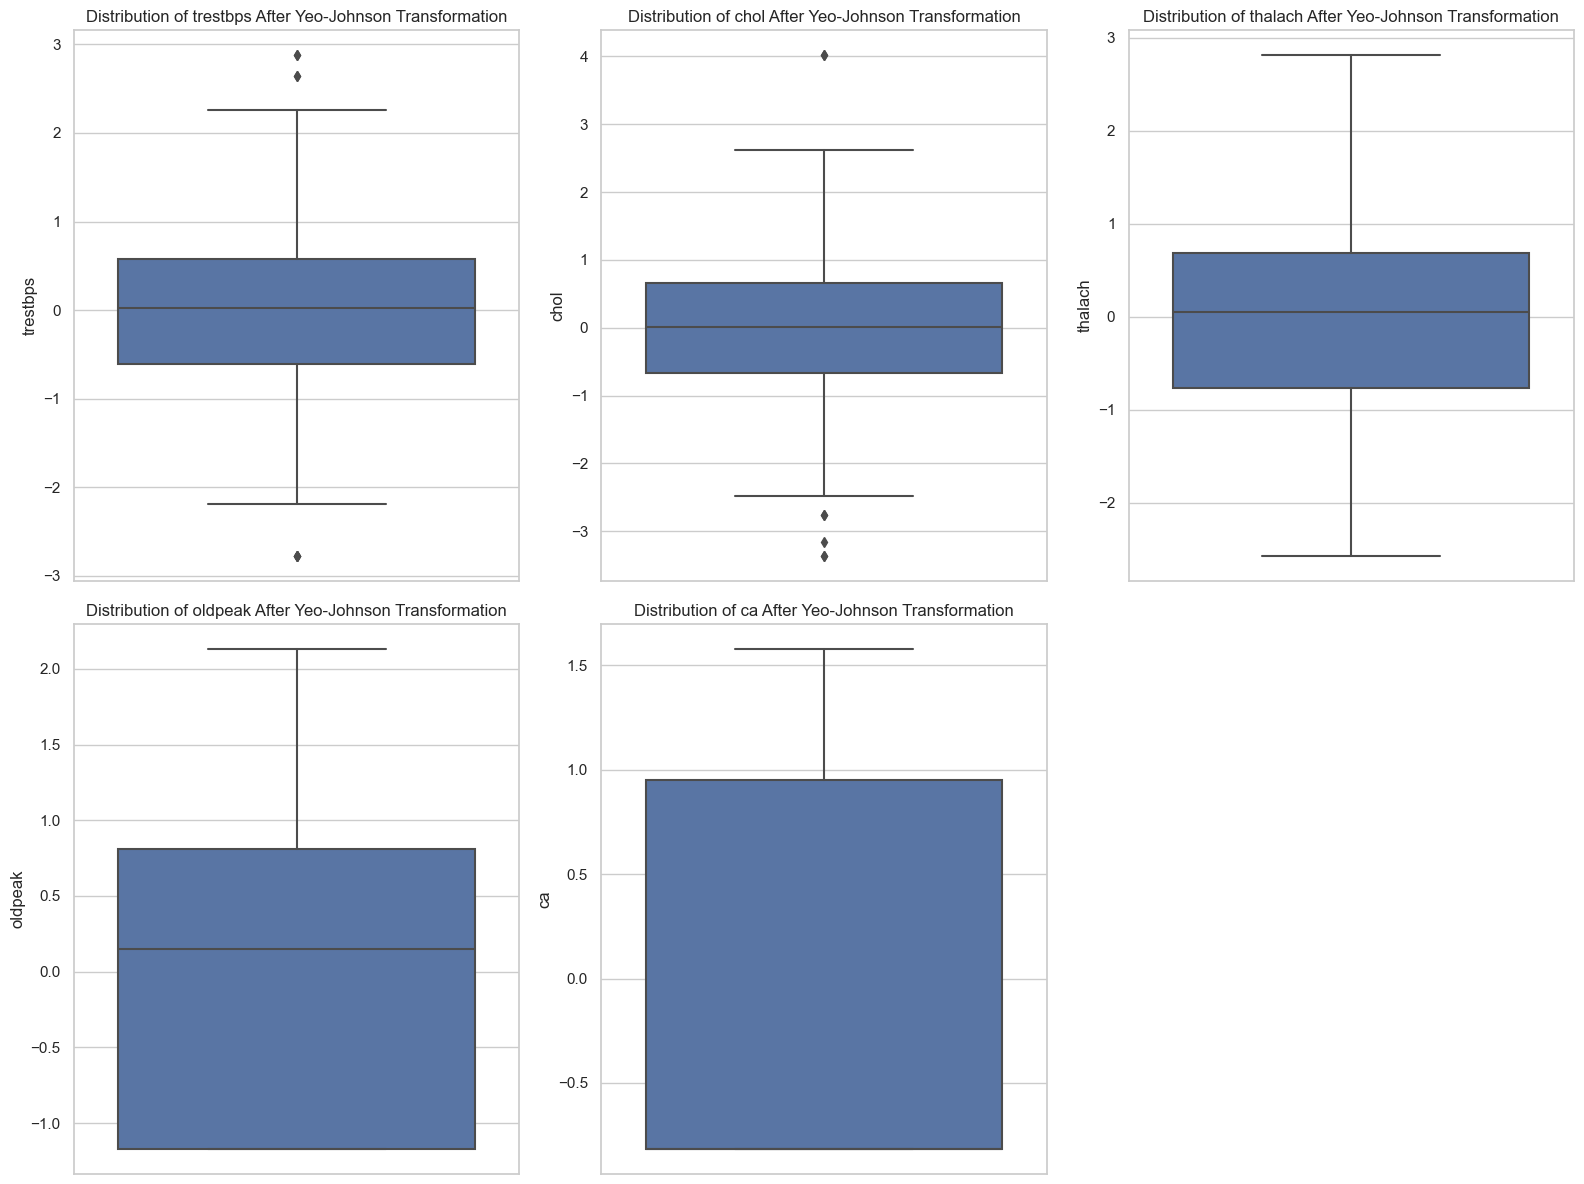

In [644]:
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Function to apply Yeo-Johnson transformation
def yeo_johnson_transform(df, columns):
    pt = PowerTransformer(method='yeo-johnson')
    df[columns] = pt.fit_transform(df[columns])
    return df

# Select numerical columns
numerical_columns = df_combined[['trestbps', 'chol', 'thalach', 'oldpeak', 'ca']].columns

# Apply Yeo-Johnson transformation
df_corrected_yeo_johnson = yeo_johnson_transform(df_combined.copy(), numerical_columns)

# Check skewness after Yeo-Johnson transformation
corrected_yeo_johnson_skewness = df_corrected_yeo_johnson[numerical_columns].skew()
print(corrected_yeo_johnson_skewness)

# Set up the plot for visualizing the transformed data
plt.figure(figsize=(16, 12))

# Loop through numerical columns and create box plots for each one
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)  # Adjust layout as necessary
    sns.boxplot(data=df_corrected_yeo_johnson, y=column)  # Pass transformed data, not skewness
    plt.title(f"Distribution of {column} After Yeo-Johnson Transformation")

plt.tight_layout()
plt.show()

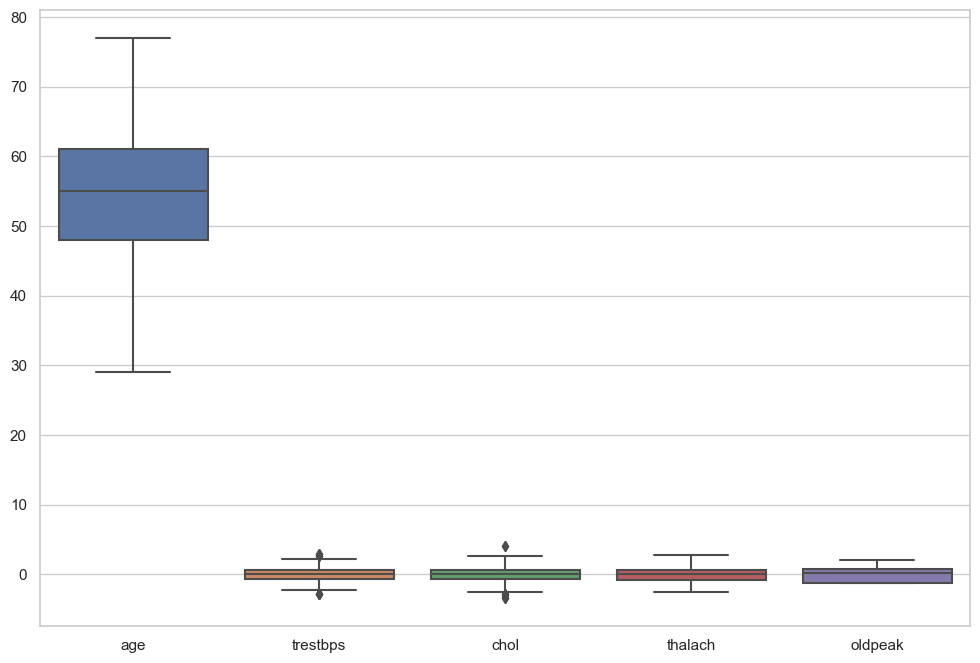

In [645]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_corrected_yeo_johnson[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.show()

Outliers has being effectively handled.

In [646]:
df_corrected_yeo_johnson.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63,male,typical angina,0.830734,-0.199950,yes,2,-0.088364,no,1.177555,downsloping,-0.816319,fixed defect,absent
1,67,male,asymptomatic,1.506635,0.810764,no,2,-1.678223,yes,0.743299,flat,1.578653,normal,present
2,67,male,asymptomatic,-0.608072,-0.286294,no,2,-0.963869,yes,1.302327,flat,1.393396,reversable defect,present
3,37,male,non-anginal pain,0.023960,0.149666,no,0,1.865283,no,1.599790,downsloping,-0.816319,normal,absent
4,41,female,atypical angina,0.023960,-0.866523,no,2,1.008582,no,0.674501,upsloping,-0.816319,normal,absent


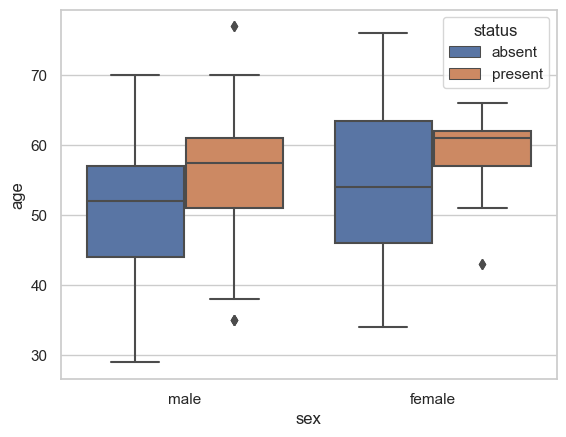

In [647]:
sns.boxplot(x='sex', y='age', hue='status', data=df_corrected_yeo_johnson)
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [648]:
# Interaction terms
df_corrected_yeo_johnson['age_trestbps_interaction'] = df_corrected_yeo_johnson['age'] * df_corrected_yeo_johnson['trestbps']
df_corrected_yeo_johnson['age_trestbps_interaction'] = df_corrected_yeo_johnson['age'] * df_corrected_yeo_johnson['trestbps']

### Encoding Categorical Variables
- Binary Categorical Variables
- Non-Binary Categorical Variables

In [649]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary categorical variables
label_encoder = LabelEncoder()
df_corrected_yeo_johnson['sex'] = label_encoder.fit_transform(df_corrected_yeo_johnson['sex'])
df_corrected_yeo_johnson['fbs'] = label_encoder.fit_transform(df_corrected_yeo_johnson['fbs'])
df_corrected_yeo_johnson['exang'] = label_encoder.fit_transform(df_corrected_yeo_johnson['exang'])
df_corrected_yeo_johnson['status'] = label_encoder.fit_transform(df_corrected_yeo_johnson['status'])
df_corrected_yeo_johnson.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status,age_trestbps_interaction
0,63,1,typical angina,0.830734,-0.199950,1,2,-0.088364,0,1.177555,downsloping,-0.816319,fixed defect,0,52.336273
1,67,1,asymptomatic,1.506635,0.810764,0,2,-1.678223,1,0.743299,flat,1.578653,normal,1,100.944566
2,67,1,asymptomatic,-0.608072,-0.286294,0,2,-0.963869,1,1.302327,flat,1.393396,reversable defect,1,-40.740851
3,37,1,non-anginal pain,0.023960,0.149666,0,0,1.865283,0,1.599790,downsloping,-0.816319,normal,0,0.886529
4,41,0,atypical angina,0.023960,-0.866523,0,2,1.008582,0,0.674501,upsloping,-0.816319,normal,0,0.982369


In [650]:
# Apply one-hot encoding for multi-class categorical columns
df_encoded = pd.get_dummies(df_corrected_yeo_johnson, columns=['cp', 'slope', 'thal', 'restecg'], drop_first=True)
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,status,...,cp_atypical angina,cp_non-anginal pain,cp_typical angina,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,thal_reversable defect,restecg_1,restecg_2
0,63,1,0.830734,-0.199950,1,-0.088364,0,1.177555,-0.816319,0,...,0,0,1,0,0,0,0,0,0,1
1,67,1,1.506635,0.810764,0,-1.678223,1,0.743299,1.578653,1,...,0,0,0,1,0,1,0,0,0,1
2,67,1,-0.608072,-0.286294,0,-0.963869,1,1.302327,1.393396,1,...,0,0,0,1,0,0,0,1,0,1
3,37,1,0.023960,0.149666,0,1.865283,0,1.599790,-0.816319,0,...,0,1,0,0,0,1,0,0,0,0
4,41,0,0.023960,-0.866523,0,1.008582,0,0.674501,-0.816319,0,...,1,0,0,0,1,1,0,0,0,1


### Data Splitting

In [651]:
df_encoded['status'].value_counts(normalize = True)

df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,status,...,cp_atypical angina,cp_non-anginal pain,cp_typical angina,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,thal_reversable defect,restecg_1,restecg_2
0,63,1,0.830734,-0.199950,1,-0.088364,0,1.177555,-0.816319,0,...,0,0,1,0,0,0,0,0,0,1
1,67,1,1.506635,0.810764,0,-1.678223,1,0.743299,1.578653,1,...,0,0,0,1,0,1,0,0,0,1
2,67,1,-0.608072,-0.286294,0,-0.963869,1,1.302327,1.393396,1,...,0,0,0,1,0,0,0,1,0,1
3,37,1,0.023960,0.149666,0,1.865283,0,1.599790,-0.816319,0,...,0,1,0,0,0,1,0,0,0,0
4,41,0,0.023960,-0.866523,0,1.008582,0,0.674501,-0.816319,0,...,1,0,0,0,1,1,0,0,0,1


In [656]:
X = df_encoded.drop('status', axis=1)  # Features
y = df_encoded['status']                 # Target

# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [658]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

#### Model Selection

In [659]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

#### Model Training(Fitting)

In [660]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)


<a id="six"></a>
## 6. Model Performance (Evaluation)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [661]:
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"{model_name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        65
           1       0.89      0.78      0.83        50

    accuracy                           0.86       115
   macro avg       0.87      0.85      0.86       115
weighted avg       0.86      0.86      0.86       115

[[60  5]
 [11 39]]
Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        65
           1       0.88      0.92      0.90        50

    accuracy                           0.91       115
   macro avg       0.91      0.91      0.91       115
weighted avg       0.91      0.91      0.91       115

[[59  6]
 [ 4 46]]
Support Vector Machine Evaluation:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85        65
           1       0.80      0.82      0.81        50

    accuracy                           0.83       1

#### Hyper-Parameter Tuning(Best Model)

In [662]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train_scaled, y_train)
print(f"Best parameters for Random Forest: {grid_rf.best_params_}")

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


#### Final RF Evaluation

In [663]:
# Final evaluation with the best hyperparameters
best_rf_model = grid_rf.best_estimator_
y_pred_best = best_rf_model.predict(X_test_scaled)

print("Final Evaluation of Best Model:")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Final Evaluation of Best Model:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        65
           1       0.92      0.92      0.92        50

    accuracy                           0.93       115
   macro avg       0.93      0.93      0.93       115
weighted avg       0.93      0.93      0.93       115

[[61  4]
 [ 4 46]]


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [664]:
# Feature importance
feature_importances = best_rf_model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]

# Print feature ranking
print("Feature ranking:")
for i in range(X_train.shape[1]):
    print(f"{i + 1}. Feature {X.columns[sorted_indices[i]]} ({feature_importances[sorted_indices[i]]:.4f})")

Feature ranking:
1. Feature ca (0.1352)
2. Feature thal_normal (0.1088)
3. Feature thalach (0.1029)
4. Feature oldpeak (0.0931)
5. Feature age_trestbps_interaction (0.0728)
6. Feature chol (0.0682)
7. Feature age (0.0679)
8. Feature exang (0.0600)
9. Feature trestbps (0.0560)
10. Feature slope_upsloping (0.0392)
11. Feature slope_flat (0.0361)
12. Feature cp_non-anginal pain (0.0318)
13. Feature sex (0.0288)
14. Feature thal_reversable defect (0.0215)
15. Feature thal_reversable defect  (0.0198)
16. Feature cp_typical angina (0.0192)
17. Feature restecg_2 (0.0170)
18. Feature cp_atypical angina (0.0136)
19. Feature fbs (0.0076)
20. Feature restecg_1 (0.0007)
